In [1]:
import numpy as np

In [ ]:
def generate_positive_definite_matrix(dim, condition_number):
    # Step 1: Generate a random orthogonal matrix Q
    Q, _ = np.linalg.qr(np.random.randn(dim, dim))
    
    # Step 2: Generate eigenvalues based on condition number
    min_eigenvalue = 1  # set a fixed minimum eigenvalue
    max_eigenvalue = condition_number * min_eigenvalue  # max eigenvalue based on condition number
    
    # Step 3: Construct the eigenvalue matrix (diagonal matrix)
    eigenvalues = np.linspace(min_eigenvalue, max_eigenvalue, dim)
    
    # Step 4: Form the matrix A = Q * Lambda * Q^T
    Lambda = np.diag(eigenvalues)  # Diagonal matrix with eigenvalues
    A = Q @ Lambda @ Q.T  # Positive definite matrix
    
    return A

# Example usage:
dim = 100  # Matrix dimension (5x5)
condition_number = 1000  # Desired condition number
A = generate_positive_definite_matrix(dim, condition_number)

# Check if the matrix is positive definite by verifying that all eigenvalues are positive
eigenvalues = np.linalg.eigvals(A)


Eigenvalues: [1.00000000e+03 9.89909091e+02 9.79818182e+02 9.69727273e+02
 9.59636364e+02 1.00000000e+00 1.10909091e+01 9.49545455e+02
 2.11818182e+01 3.12727273e+01 4.13636364e+01 9.39454545e+02
 9.29363636e+02 9.19272727e+02 5.14545455e+01 6.15454545e+01
 7.16363636e+01 9.09181818e+02 8.17272727e+01 9.18181818e+01
 8.99090909e+02 8.89000000e+02 1.01909091e+02 8.78909091e+02
 1.12000000e+02 8.68818182e+02 8.58727273e+02 1.22090909e+02
 1.32181818e+02 8.48636364e+02 1.42272727e+02 8.38545455e+02
 8.28454545e+02 1.52363636e+02 8.18363636e+02 1.62454545e+02
 8.08272727e+02 1.82636364e+02 1.72545455e+02 7.98181818e+02
 1.92727273e+02 7.88090909e+02 7.78000000e+02 2.02818182e+02
 7.67909091e+02 2.12909091e+02 2.23000000e+02 7.57818182e+02
 7.47727273e+02 2.33090909e+02 7.37636364e+02 2.43181818e+02
 2.53272727e+02 7.27545455e+02 2.63363636e+02 7.17454545e+02
 7.07363636e+02 2.73454545e+02 2.83545455e+02 6.97272727e+02
 6.87181818e+02 6.77090909e+02 2.93636364e+02 3.03727273e+02
 3.13818182

In [120]:
A=generate_positive_definite_matrix(100,1)
B=generate_positive_definite_matrix(100,10)
C=generate_positive_definite_matrix(100,100)
D=generate_positive_definite_matrix(100,1000)
E=generate_positive_definite_matrix(100,10000)
F=generate_positive_definite_matrix(100,100000)
Matlist=[A,B,C,D,E,F]
condList=[1,10,100,1000,10000,100000]
lr=[.01,.01,.01,.001,.0001,.00001]

In [121]:
h=np.random.uniform(0,5,100)
def f(x,A):
    return .5*x.T@A@x-h.T@x

def df(x,A):
    return A@x-h


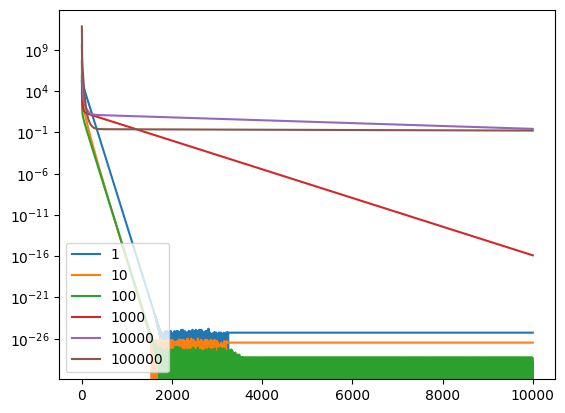

In [122]:
import matplotlib.pyplot as plt
arr=[]
for i in range(len(Matlist)):
    arr=[]
    x=np.random.uniform(0,1,100)


    for j in range(10000):
        arr.append(f(x,Matlist[i]))
        x=x-lr[i]*df(x,Matlist[i])
        
        
    y=f(np.linalg.inv(Matlist[i])@h,Matlist[i])
    arr2= [(i-y)**2 for i in arr]
    plt.plot(np.arange(len(arr2)),arr2,label=condList[i])

plt.yscale('log')
plt.legend()
plt.show()

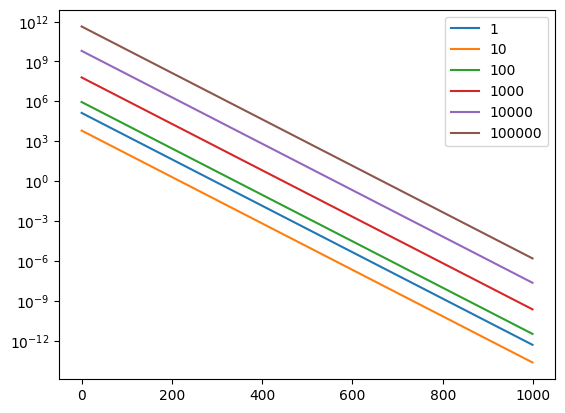

In [127]:
import matplotlib.pyplot as plt
arr=[]
for i in range(len(Matlist)):
    arr=[]
    x=np.random.uniform(0,1,100)
    H=np.linalg.inv(Matlist[i])

    for j in range(1000):
        arr.append(f(x,Matlist[i]))
        x=x-.01*H@df(x,Matlist[i])
        
        
    y=f(np.linalg.inv(Matlist[i])@h,Matlist[i])
    arr2= [(i-y)**2 for i in arr]
    plt.plot(np.arange(len(arr2)),arr2,label=condList[i])

plt.yscale('log')
plt.legend()
plt.show()

In [25]:
y=f(np.linalg.inv(A)@h)
arr3= [(x-y)**2 for x in arr]